# Telecom Customer Churn - Introduction
This dataset comes from an Iranian telecom company, with each row representing a customer over a year period. Along with a churn label, there is information on the customers' activity, such as call failures and subscription length. 

Not sure where to begin? Scroll to the bottom to find challenges!

In [1]:
import pandas as pd

pd.read_csv("data/customer_churn.csv")

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,21,0,19,2,6697,147,92,44,2,2,1,25,721.980,0
3146,17,0,17,1,9237,177,80,42,5,1,1,55,261.210,0
3147,13,0,18,4,3157,51,38,21,3,1,1,30,280.320,0
3148,7,0,11,2,4695,46,222,12,3,1,1,30,1077.640,0


## Data Dictionary
| Column                  | Explanation                                             |
|-------------------------|---------------------------------------------------------|
| Call Failure            | number of call failures                                 |
| Complains               | binary (0: No complaint, 1: complaint)                  |
| Subscription Length     | total months of subscription                            |
| Charge Amount           | ordinal attribute (0: lowest amount, 9: highest amount) |
| Seconds of Use          | total seconds of calls                                  |
| Frequency of use        | total number of calls                                   |
| Frequency of SMS        | total number of text messages                           |
| Distinct Called Numbers | total number of distinct phone calls                    |
| Age Group               | ordinal attribute (1: younger age, 5: older age)        |
| Tariff Plan             | binary (1: Pay as you go, 2: contractual)               |
| Status                  | binary (1: active, 2: non-active)                       |
| Age                     | age of customer                                         |
| Customer Value          | the calculated value of customer                        |
| Churn                   | class label (1: churn, 0: non-churn)                    |

[Source](https://www.kaggle.com/royjafari/customer-churn)  of dataset and [source](https://archive.ics.uci.edu/ml/datasets/Iranian+Churn+Dataset) of dataset description. 

**Citation**: Jafari-Marandi, R., Denton, J., Idris, A., Smith, B. K., & Keramati, A. (2020). Optimum Profit-Driven Churn Decision Making: Innovative Artificial Neural Networks in Telecom Industry. Neural Computing and Applications.

# Object and Motivation

* Im going to propose a model that predicts Customer Churn Better than a Baseline Classifier
* Im going to undeline the most important causes related to customer Churn
* In chapter 3 I will explore the data, showing appropriated graphs and making observations about the findings 
* In chapter 4 I will design the model and show its performance and the most important variables in churn customers
* Finally in chapter 5 i will make conclusions and recomendations 

# Exploratory Data Analysis 

In [2]:
## Basic Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 


## Datafrane definition

In [4]:
df=pd.read_csv("data/customer_churn.csv")

In [5]:
df.shape

(3150, 14)

## Statistical description

In [6]:
df.describe()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,0.076508,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,2.826032,1.077778,1.248254,30.998413,470.972916,0.157143
std,7.263886,0.265851,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.892555,0.267864,0.432069,8.831095,517.015433,0.363993
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,0.000000,0.000000
25%,1.000000,0.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,2.000000,1.000000,1.000000,25.000000,113.801250,0.000000
50%,6.000000,0.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,3.000000,1.000000,1.000000,30.000000,228.480000,0.000000
75%,12.000000,0.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,3.000000,1.000000,1.000000,30.000000,788.388750,0.000000
max,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,2.000000,2.000000,55.000000,2165.280000,1.000000


## Null Cells

In [7]:
df.isna().sum()

Call Failure               0
Complains                  0
Subscription Length        0
Charge Amount              0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

## Date types

In [8]:
df.dtypes

Call Failure                 int64
Complains                    int64
Subscription Length          int64
Charge Amount                int64
Seconds of Use               int64
Frequency of use             int64
Frequency of SMS             int64
Distinct Called Numbers      int64
Age Group                    int64
Tariff Plan                  int64
Status                       int64
Age                          int64
Customer Value             float64
Churn                        int64
dtype: object

## Variables relationship and visual exploration

### Frecuency of use by age groups

In [9]:
df.groupby('Age Group')[['Age']].agg(['min','max'])

Age    
          min max
Age Group        
1          15  15
2          25  25
3          30  30
4          45  45
5          55  55

In [10]:
df.groupby('Age Group')[['Frequency of SMS','Frequency of use']].mean()

,Frequency of SMS,Frequency of use
Age Group,,
1,20.195122,76.642276
2,75.499518,72.075217
3,90.042807,68.442807
4,42.053165,60.562025
5,28.247059,77.523529


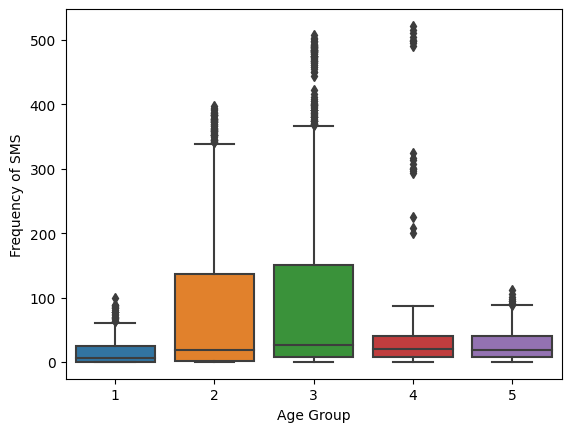

In [11]:
g=sns.boxplot(data=df,x='Age Group',y='Frequency of SMS')

Text(0.5, 1.0, 'Frecuency of SMS by age distribution')

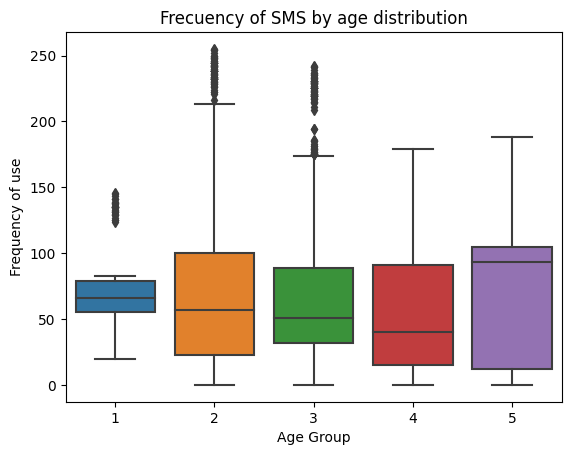

In [12]:
g=sns.boxplot(data=df,x='Age Group',y='Frequency of use')
g.set_title('Frecuency of SMS by age distribution')

***Observation:***
Age Groups 4 and 5 uses comparatively much less SMS than Calls

### Seconds of use by Age Group and Tariff Plan

Text(0.5, 1.0, 'Seconds of Use by Age Group and Tariff')

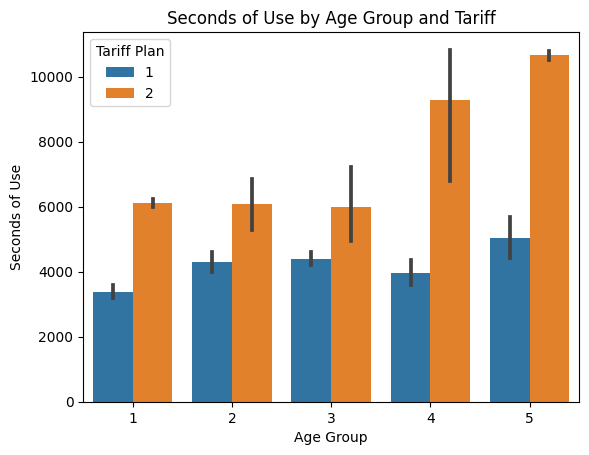

In [13]:
g=sns.barplot(data=df,x='Age Group',y='Seconds of Use',hue='Tariff Plan')
g.set_title('Seconds of Use by Age Group and Tariff')

### Call Failure, Complains and Subscription Length vs Churn/No Churn

[Text(0, 0, 'No Churn'), Text(1, 0, 'Churn')]

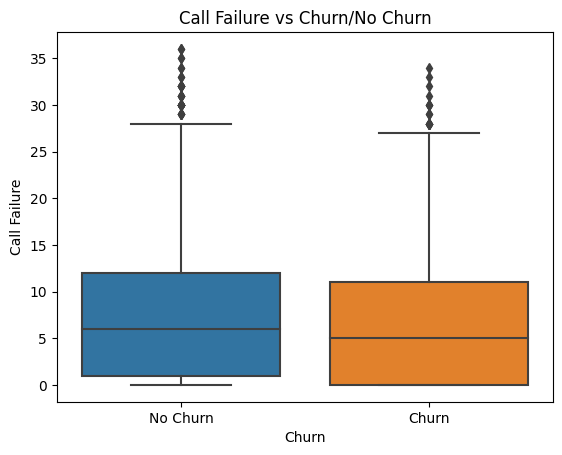

In [14]:
g=sns.boxplot(data=df,y='Call Failure',x='Churn')
g.set_title('Call Failure vs Churn/No Churn')
g.set_xticklabels(['No Churn','Churn'])

[Text(0, 0, 'No Churn'), Text(1, 0, 'Churn')]

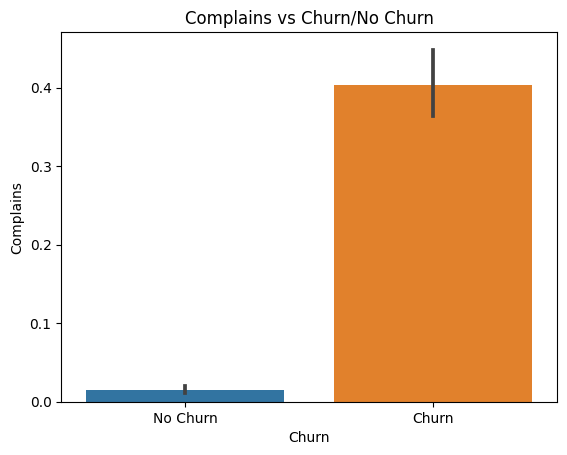

In [15]:
g=sns.barplot(data=df,y='Complains',x='Churn')
g.set_title('Complains vs Churn/No Churn')
g.set_xticklabels(['No Churn','Churn'])

[Text(0, 0, 'No Churn'), Text(1, 0, 'Churn')]

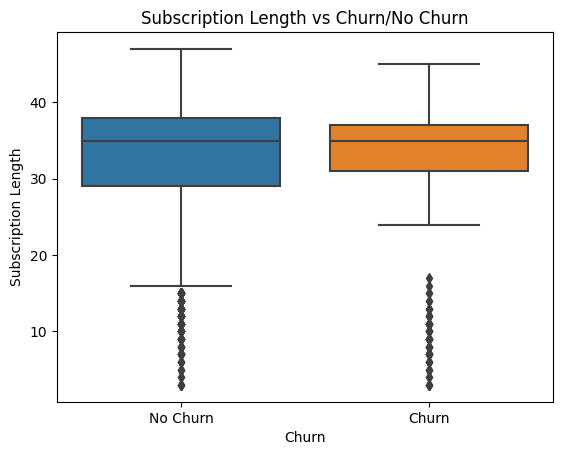

In [16]:
g=sns.boxplot(data=df,y='Subscription Length',x='Churn')
g.set_title('Subscription Length vs Churn/No Churn')
g.set_xticklabels(['No Churn','Churn'])

***Observations***

* All the customer that Churn had complains.
* The customer mostly Churn between 32 and 38 months. The median is about 35 months.
* The median of Call failures in customers that churns is about 5.

### Correlation between possible features and Features with Target

<AxesSubplot:>

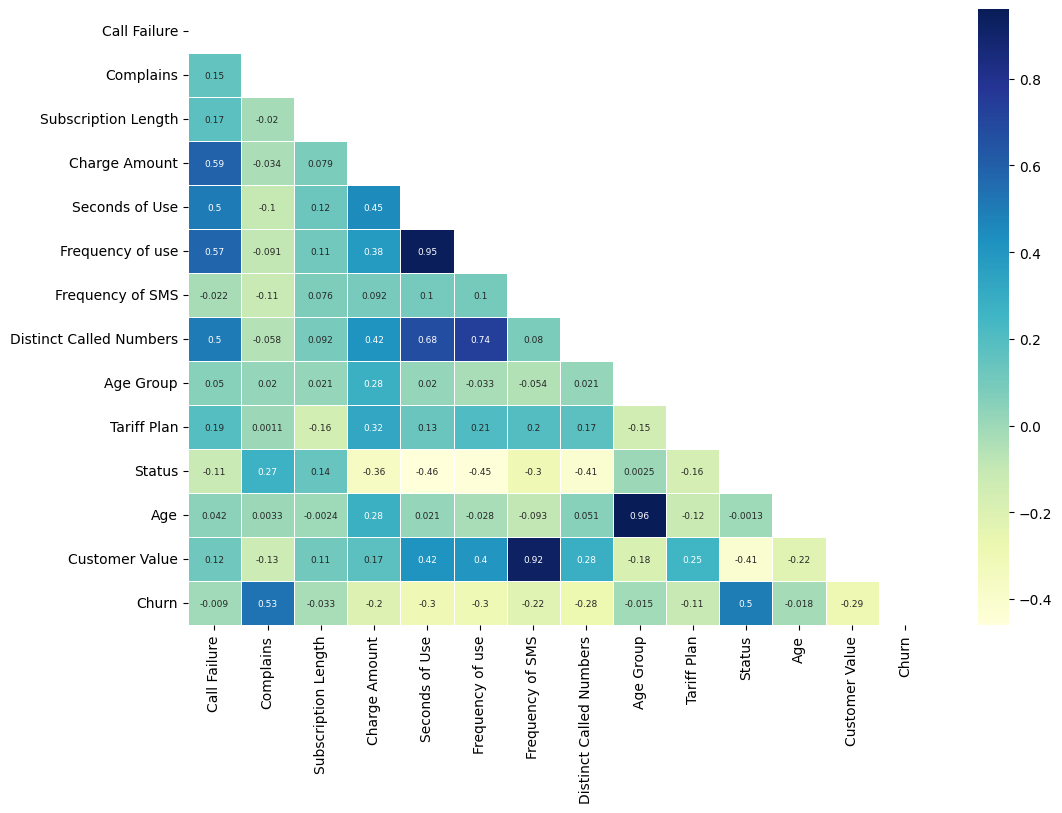

In [17]:
plt.figure(figsize=(12,8))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(df.corr(),cmap="YlGnBu",linewidths=0.5,annot=True,annot_kws={"size":6.5},mask=mask)

***Highly positively or negatively correlated features with Churn***: Status, Complaints, Distinct Numbers, Freq of use, Customer Value

***Highly positively correlated pairs of features***: Age group with age, Freq of use with seconds of use, Customer value with freq of sms

# Machine Learning Prediction Analysis

## Baseline prediction Case - Zero Rate Classifier

In [18]:
df['Churn'].value_counts(normalize=True)

0    0.842857
1    0.157143
Name: Churn, dtype: float64

[Text(0, 0, 'Churn'), Text(1, 0, 'No Churn')]

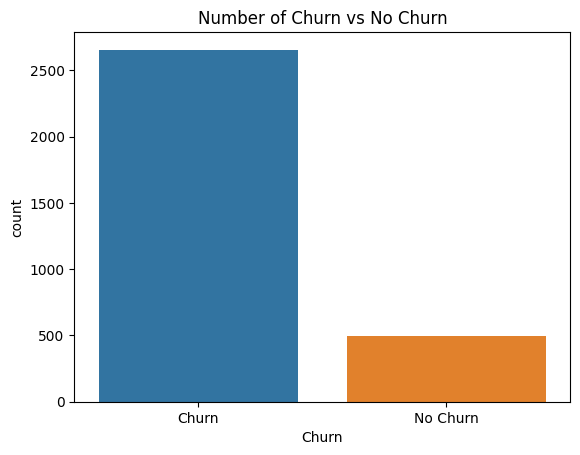

In [19]:
g=sns.countplot(data=df,x='Churn')
g.set_title('Number of Churn vs No Churn')
g.set_xticklabels(['Churn','No Churn'])

This is a highly imbalance problem. About 85% of targets labels are 0, what means that this percentage didn't churn.
So a Zero rate Classifier that always predict a "No Churn" scenary would have an accuracy score close to 85%! 
So Our predictor have to do it better than that.

## Machine learning model Definition

### Preprocessing the data

#### Drop redundant columns 

In [20]:
# Drop Age Column (highly correlated with Age Group)
df=df.drop('Age',axis=1)

#### Make new columns with the combination of others

In [21]:
# Make a column with the ratio of freq of SMS of the total use droping both columns ('Frequency of Use' and 'Frequency of SMS')
df['SMS ratio']=df['Frequency of SMS']/(df['Frequency of SMS'] + df['Frequency of use'])
df.loc[~np.isfinite(df['SMS ratio']), 'SMS ratio'] = 0
df=df.drop(['Frequency of SMS','Frequency of use'],axis=1)

#### Convert seconds of use to categories according to bins

In [22]:
# Categorize Seconds of use in three distinct groups and drop Seconds of use
df['Seconds_Use_Group']=pd.qcut(df['Seconds of Use'],4,labels=False)
df=df.drop('Seconds of Use',axis=1)

In [23]:
df.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Distinct Called Numbers,Age Group,Tariff Plan,Status,Customer Value,Churn,SMS ratio,Seconds_Use_Group
0,8,0,38,0,17,3,1,1,197.640,0,0.065789,2
1,0,0,39,0,4,2,1,2,46.035,0,0.583333,0
2,10,0,37,0,24,3,1,1,1536.520,0,0.856802,1
3,10,0,38,0,35,1,1,1,240.020,0,0.014925,2
4,3,0,38,0,33,1,1,1,145.805,0,0.033333,1


## Defining Target Variable and Features

In [24]:
X=df.drop('Churn',axis=1)
y=df['Churn']

## Basic Imports

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

## Instanciate Models

In [26]:
scaler=StandardScaler()
rf_clf=RandomForestClassifier()

In [27]:
rf_clf.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

## Define Pipeline

In [28]:
params_pipe = {"randomforestclassifier__n_estimators":[100,250,500],
               "randomforestclassifier__max_features":['log2', 'auto', 'sqrt'],
               "randomforestclassifier__max_depth":[10, 15],
                "randomforestclassifier__min_samples_leaf":[2, 4, 10]}

In [29]:
pipe=make_pipeline(scaler,rf_clf)

## Test and Training Sets

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42, stratify=y)

## Tuning the model

In [31]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_pipe = GridSearchCV(estimator=pipe,param_grid=params_pipe,cv=kf)

In [32]:
grid_pipe.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             param_grid={'randomforestclassifier__max_depth': [10, 15],
                         'randomforestclassifier__max_features': ['log2',
                                                                  'auto',
                                                                  'sqrt'],
                         'randomforestclassifier__min_samples_leaf': [2, 4, 10],
                         'randomforestclassifier__n_estimators': [100, 250,
                                                                  500]})

## Best Model and Score

In [33]:
grid_pipe.best_params_

{'randomforestclassifier__max_depth': 15,
 'randomforestclassifier__max_features': 'sqrt',
 'randomforestclassifier__min_samples_leaf': 2,
 'randomforestclassifier__n_estimators': 100}

In [34]:
grid_pipe.best_score_

0.9476190476190475

In [35]:
best_model=grid_pipe.best_estimator_
y_pred=best_model.predict(X_test)

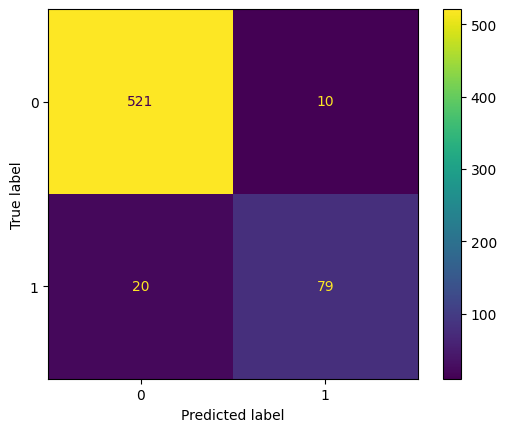

In [36]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       531
           1       0.89      0.80      0.84        99

    accuracy                           0.95       630
   macro avg       0.93      0.89      0.91       630
weighted avg       0.95      0.95      0.95       630



## Feature Influence - What Causes or its related with Churn?

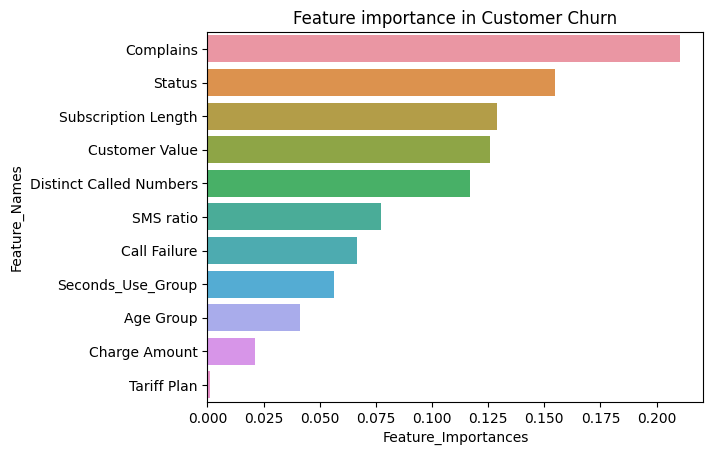

In [39]:
feature_importances = best_model.steps[1][1].feature_importances_
feature_names=X.columns
df_features=pd.DataFrame({'Feature_Names':feature_names,'Feature_Importances':feature_importances}).sort_values('Feature_Importances',ascending=False)
g=sns.barplot(data=df_features,x='Feature_Importances',y='Feature_Names')
g.set_title('Feature importance in Customer Churn')
plt.show()

# Final Conclusions

* The Model performed better than the baseline comparison model with an accuracy of about 95% versus 85%. More important it correctly classified Customer Churn about 80% of the cases
* The most influencial variables related with Churn are: Complains - Status- Susbscription Lenght - Customer Value - Distinct Called Numbers - SMS ratio and Call Failure


***Actions that could prevent Churn***
* Run the model in the current group of Customers. Identify The customer situation in the likely Churn cases
* Taking care on Complains, calling the customers and offering a compensation
* Monitor Subcription Lenghts, because most of the Customers Churns appeared at about 32 to 38 months, and offering promotional discounts or benefits. The benefits could have been decided by age group taking on acount SMS vs Calls frequency (see Graphs in Exploratory Analysis)
* Tracking Call Failures if it is possible. When Call Failures exceed 5 contact the customer